In [3]:
# !pip install graphviz
# ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html
# graphviz-9.0.0 (64-bit) EXE installer [sha256] 또는 graphviz-9.0.0 (32-bit) EXE installer [sha256] 설치 

# exe 파일을 다운로드 받아서 설치하고, 환경변수에 추가해준다.
# 참고 PATH 는 OS 가 프로그램을 시작하기 전에 프로그램을 찾기 위한 사전 경로 이다. 
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin' # Graphviz의 경로를 추가해 준다. 

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import numpy as np
import graphviz
import multiprocessing
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,  train_test_split
from sklearn.pipeline import make_pipeline

## 분류를 위한 데이터

### 붓꽃 데이터

In [7]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
# iris_df

### 와인 데이터

In [8]:
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df['target'] = wine.target
# wine_df

### 유방암 데이터

In [9]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
# cancer_df

## Regression 데이터

### 보스턴 주택 가격 데이터

In [10]:
# url 을 통해서 불러오세요 
import pandas as pd
url = "https://raw.githubusercontent.com/myoh0623/dataset/main/boston.csv"
boston_df = pd.read_csv(url)
x = boston_df.iloc[:, 0:-1]
y = boston_df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

### 당뇨병 데이터

In [11]:
diabetes = load_diabetes()

In [12]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
# diabetes_df

## 분류 - `DecisionTreeClassifier()`

- `DecisionTreeClassifier`는 분류를 위한 결정트리 모델
- 두개의 배열 x, y를 입력 받음
  - x는 [n_samples, n_features] 크기의 데이터 특성 배열
  - y는 [n_samples] 크기의 정답 배열

In [13]:
# Test Sets
x = [[0, 0], [1, 1]]
y = [0, 1]

model = tree.DecisionTreeClassifier()
model.fit(x, y)

DecisionTreeClassifier()

In [14]:
model.predict([[2., 2.]])

array([1])

In [15]:
model.predict_proba([[2., 2.]])

array([[0., 1.]])

In [16]:
r = tree.export_text(decision_tree=model,
                     feature_names=["X_1", "X_2"])
print(r)

|--- X_2 <= 0.50
|   |--- class: 0
|--- X_2 >  0.50
|   |--- class: 1



[Text(0.5, 0.75, 'x[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

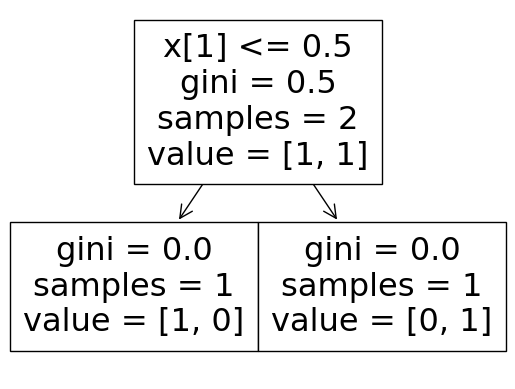

In [17]:
tree.plot_tree(model)

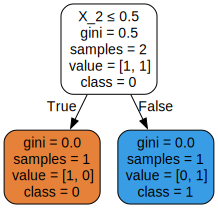

In [18]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names = ["X_1", "X_2"],
                                class_names = ["0", "1"],
                                filled = True, rounded = True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### 붓꽃 데이터 학습

#### 교차검증

#### StandardScaler를 용해 전처리 여부에 영향을 받는지 확인해 보자

##### 전처리 없이 학습

In [19]:
model = tree.DecisionTreeClassifier()

In [20]:
cross_val_score(estimator=model,
                cv=5,
                X=iris.data, y=iris.target,
                n_jobs=multiprocessing.cpu_count()
                )

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

##### 전처리 후 학습
* 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

In [52]:
model = make_pipeline(
    StandardScaler(),
    tree.DecisionTreeClassifier()
)

In [53]:
cross_val_score(estimator=model,
                cv=5,
                X=iris.data, y=iris.target,
                n_jobs=multiprocessing.cpu_count()
                )

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

#### 학습된 결정 트리 시각화

In [54]:
model = tree.DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [55]:
r = tree.export_text(decision_tree=model,
                     feature_names=iris.feature_names)
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



##### plot_tree를 사용한 시각화

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

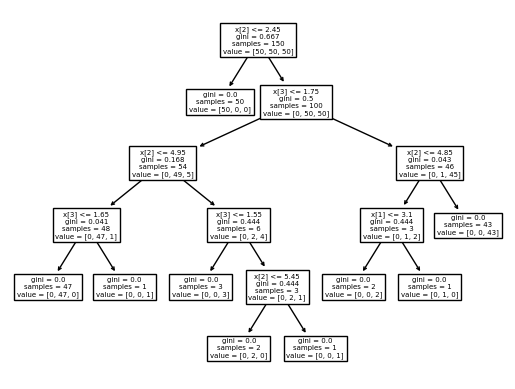

In [56]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

In [57]:
# https://graphviz.readthedocs.io/en/stable/examples.html

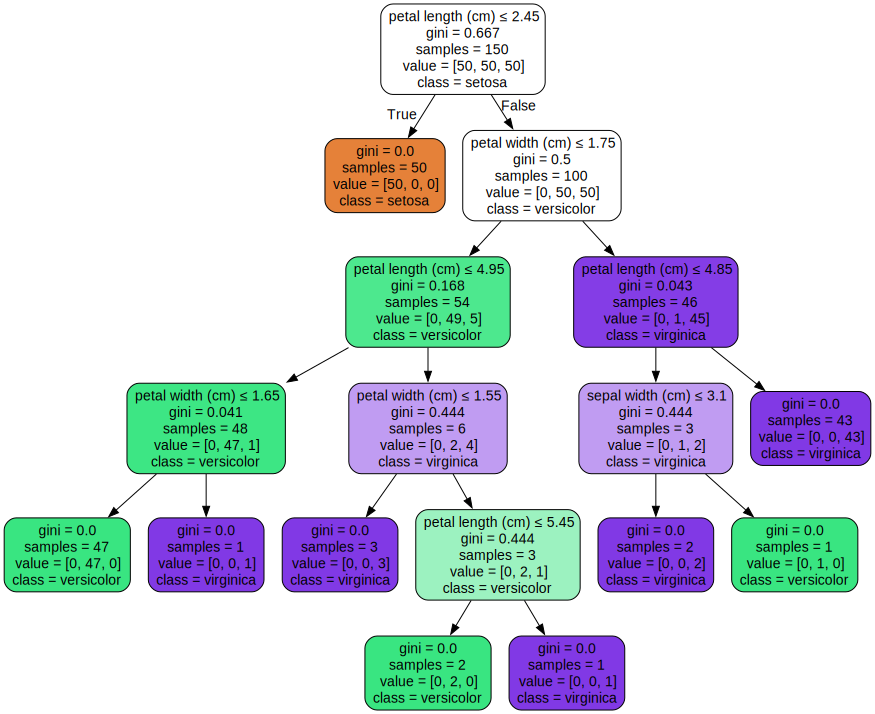

In [61]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled = True, rounded = True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

In [28]:
n_classes = 3
plot_colors = 'ryb'
plot_step=.02

##### 결정 경계 시각화

(0.0, 7.88, -0.9, 3.4800000000000044)

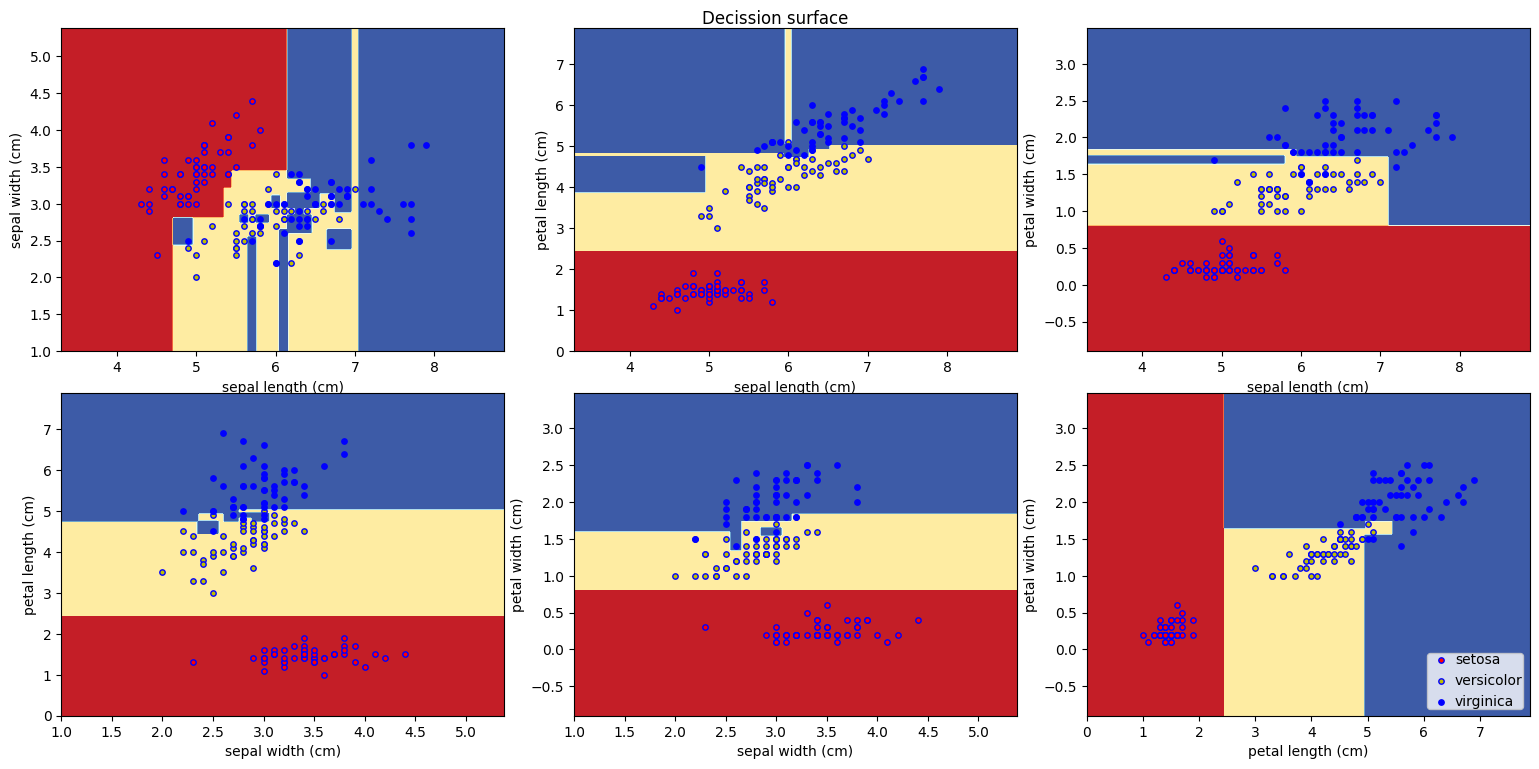

In [29]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = iris.data[:, pair]
  y = iris.target

  model = tree.DecisionTreeClassifier()
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### max_depth 변화에 따른 결정 경계의 변화 확인

(0.0, 7.88, -0.9, 3.4800000000000044)

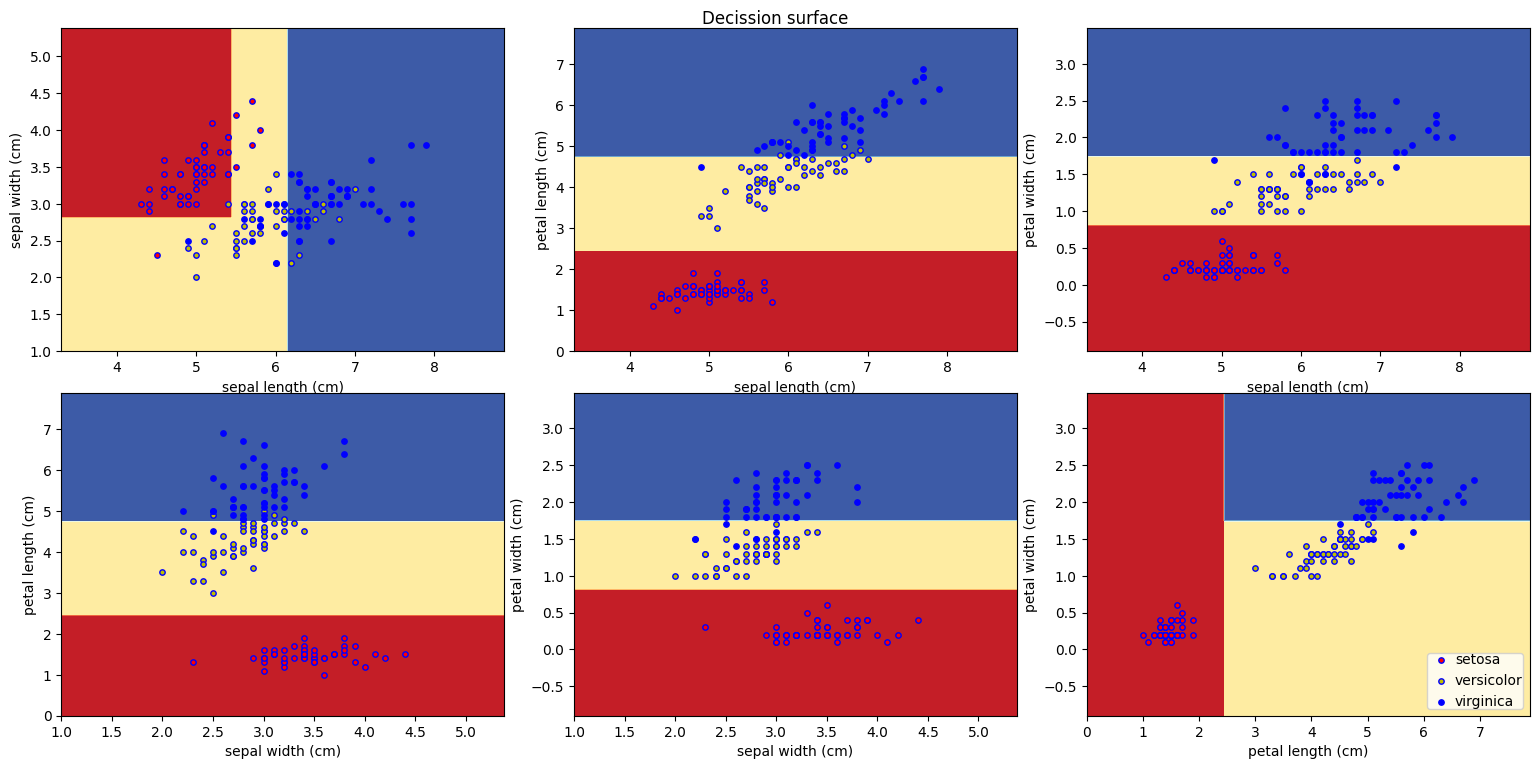

In [30]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = iris.data[:, pair]
  y = iris.target

  model = tree.DecisionTreeClassifier(max_depth=2)
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

### 와인 데이터 학습

#### 교차 검증

In [31]:
model = tree.DecisionTreeClassifier()

##### 전처리 없이 학습

In [32]:
model = tree.DecisionTreeClassifier()
cross_val_score(estimator=model,
                X = wine.data, y = wine.target,
                cv=5,
                n_jobs = multiprocessing.cpu_count()
                )

array([0.94444444, 0.77777778, 0.94444444, 0.91428571, 0.85714286])

##### 전처리 후 학습

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [34]:
model_pipe = Pipeline(steps=[('scaler', StandardScaler()),
                                ('model', tree.DecisionTreeClassifier())])

In [35]:
param_grid =[{"model__criterion":['gini', 'entropy'],
              "model__min_samples_leaf":[1, 2, 3, 4, 5, 6, 7, 8, 9],
              "model__max_depth":[2, 3, 4, 5, 6, None],
              "model__min_samples_split":[2, 3, 4, 5, 6, 7, 8, 9, 10],
}]

gs = GridSearchCV(
    estimator = model_pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose = True 
)

In [36]:
gs.fit(wine.data, wine.target)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=6,
             param_grid=[{'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [2, 3, 4, 5, 6, None],
                          'model__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                          'model__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9,
                                                       10]}],
             verbose=True)

In [37]:
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

0.9276190476190477
{'model__criterion': 'entropy', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 2}
Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=3))])


#### 학습된 결정 트리 시각화

##### 텍스트를 통한 시각화

In [38]:
r = tree.export_text(decision_tree=gs.best_estimator_['model'], # model_pipe['model']
                     feature_names = wine.feature_names)
print(r)

|--- flavanoids <= -0.46
|   |--- color_intensity <= -0.53
|   |   |--- class: 1
|   |--- color_intensity >  -0.53
|   |   |--- hue <= -0.25
|   |   |   |--- class: 2
|   |   |--- hue >  -0.25
|   |   |   |--- class: 2
|--- flavanoids >  -0.46
|   |--- proline <= -0.07
|   |   |--- alcohol <= 0.22
|   |   |   |--- class: 1
|   |   |--- alcohol >  0.22
|   |   |   |--- class: 1
|   |--- proline >  -0.07
|   |   |--- color_intensity <= -0.69
|   |   |   |--- class: 1
|   |   |--- color_intensity >  -0.69
|   |   |   |--- class: 0



##### plot_tree를 사용한 시각화

[Text(0.4230769230769231, 0.875, 'x[6] <= -0.456\nentropy = 1.567\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(0.15384615384615385, 0.625, 'x[9] <= -0.533\nentropy = 0.771\nsamples = 62\nvalue = [0, 14, 48]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0]'),
 Text(0.23076923076923078, 0.375, 'x[10] <= -0.252\nentropy = 0.144\nsamples = 49\nvalue = [0, 1, 48]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.0\nsamples = 46\nvalue = [0, 0, 46]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.6923076923076923, 0.625, 'x[12] <= -0.071\nentropy = 1.0\nsamples = 116\nvalue = [59, 57, 0]'),
 Text(0.5384615384615384, 0.375, 'x[0] <= 0.215\nentropy = 0.133\nsamples = 54\nvalue = [1, 53, 0]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.0\nsamples = 50\nvalue = [0, 50, 0]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(0.8461538461538461, 0.375, 'x[9] <= -0.691\n

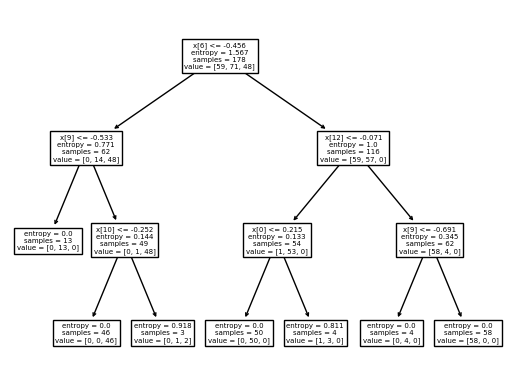

In [39]:
tree.plot_tree(gs.best_estimator_['model'])

##### graphviz를 사용한 시각화

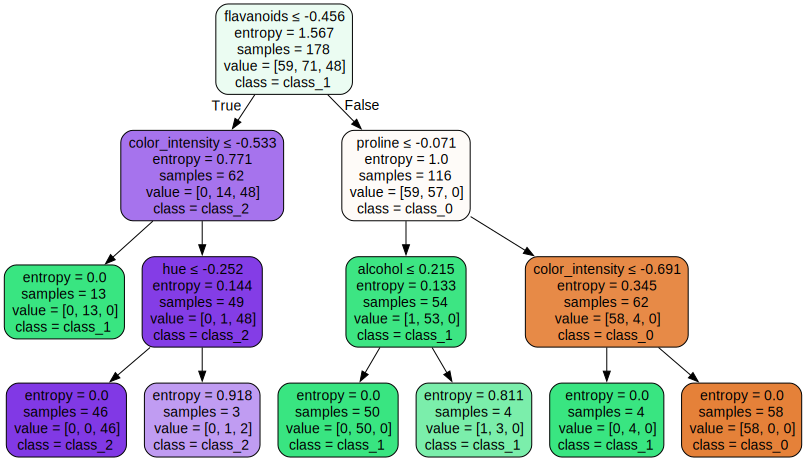

In [40]:
dot_data = tree.export_graphviz(decision_tree=gs.best_estimator_['model'],
                                feature_names = wine.feature_names,
                                class_names = wine.target_names,
                                filled = True, rounded = True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

##### 결정 경계 시각화

In [41]:
n_classes = 3
plot_colors = 'ryb'
plot_step=0.02

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

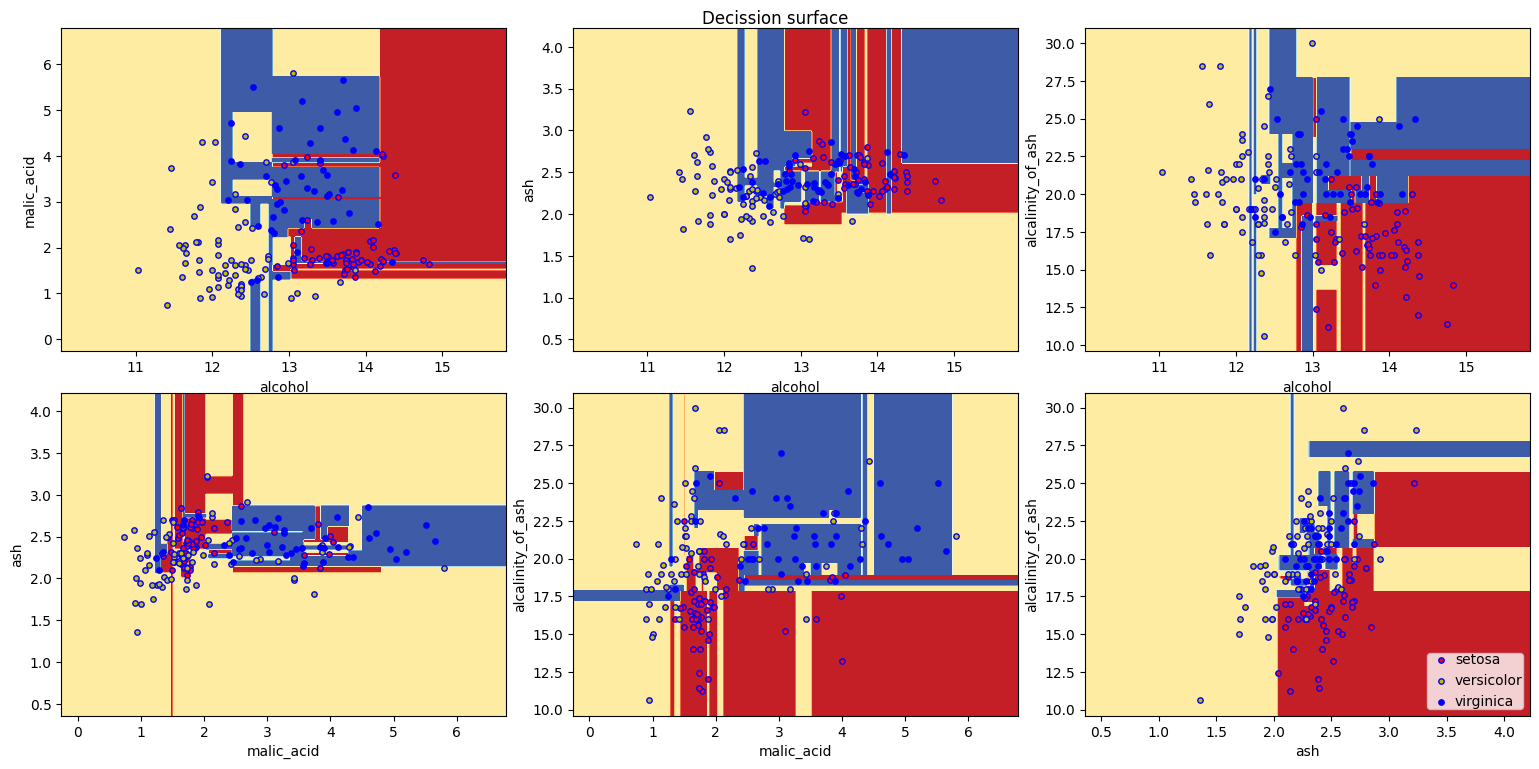

In [42]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = wine.data[:, pair]
  y = wine.target

  model = tree.DecisionTreeClassifier()
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### max_depth 변화에 따른 결정 경계의 변화 확인

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

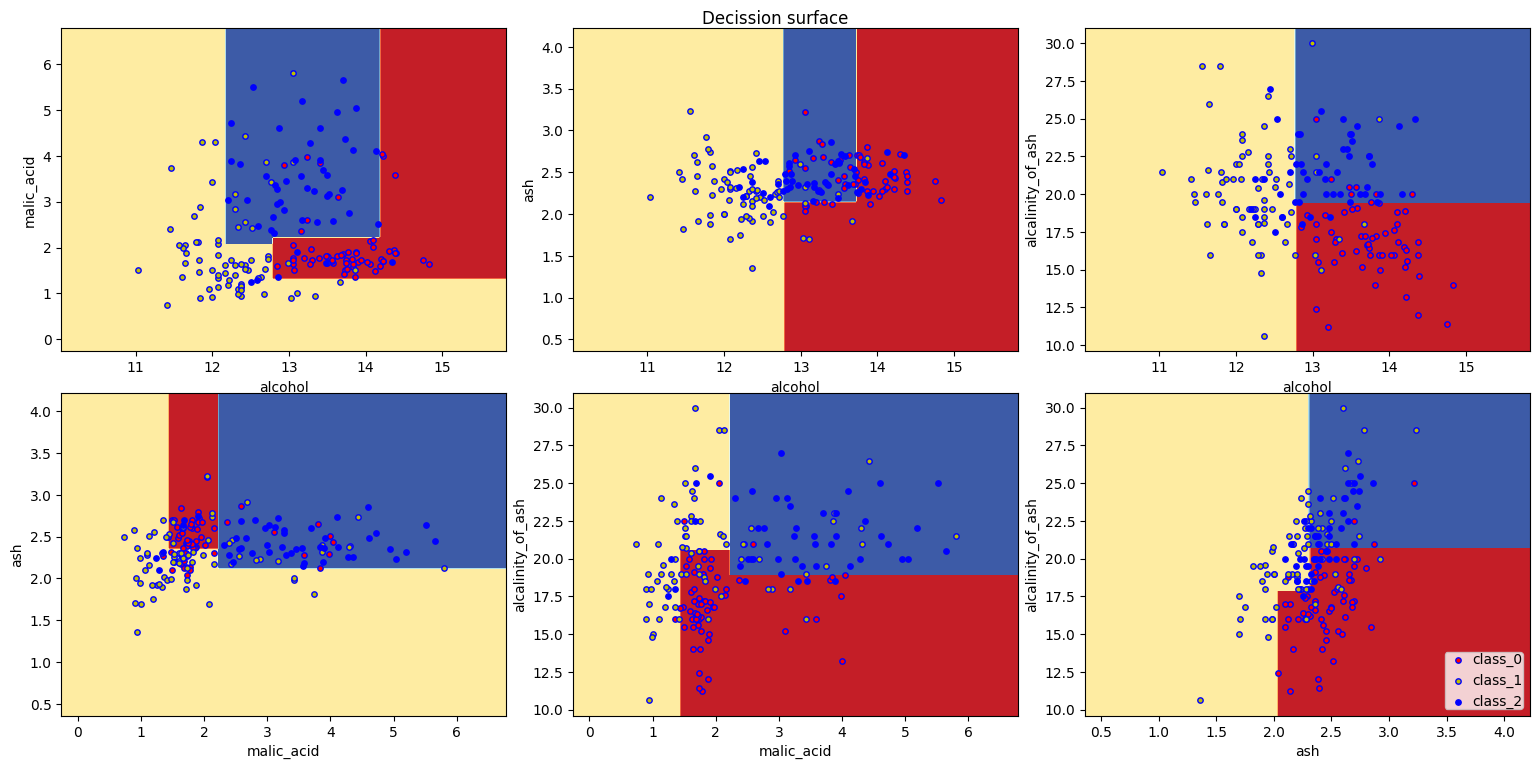

In [43]:
# grid search 를 통해서 찾은 최적의 파라미터를 사용한 결정 결계 변화
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = wine.data[:, pair]
  y = wine.target

  model = gs.best_estimator_
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = wine.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

### 유방암 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [44]:
model = tree.DecisionTreeClassifier()

cross_val_score(estimator=model,
                X=cancer.data, y = cancer.target,
                cv=5,
                n_jobs = multiprocessing.cpu_count()
                )

array([0.9122807 , 0.92982456, 0.9122807 , 0.94736842, 0.91150442])

##### 전처리 후 학습

In [45]:
model_pipe = Pipeline(steps=[('scaler', StandardScaler()),
                                ('model', tree.DecisionTreeClassifier())])

param_grid =[{"model__criterion":['gini', 'entropy'],
              "model__min_samples_leaf":[1, 2, 3, 4, 5, 6, 7, 8, 9],
              "model__max_depth":[2, 3, 4, 5, 6, None],
              "model__min_samples_split":[2, 3, 4, 5, 6, 7, 8, 9, 10],
}]

gs = GridSearchCV(
    estimator = model_pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose = True 
)

gs.fit(cancer.data, cancer.target)

print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
0.9472752678155565
{'model__criterion': 'entropy', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2}
Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=4))])


#### 학습된 결정 트리 시각화

##### 텍스트를 통한 시각화

In [46]:
r = tree.export_text(decision_tree=gs.best_estimator_['model'], # model_pipe['model']
                     feature_names = cancer.feature_names)
print(r)

|--- worst perimeter <= -0.04
|   |--- worst concave points <= 0.31
|   |   |--- area error <= 0.19
|   |   |   |--- worst texture <= 0.73
|   |   |   |   |--- class: 1
|   |   |   |--- worst texture >  0.73
|   |   |   |   |--- worst area <= -0.42
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- worst area >  -0.42
|   |   |   |   |   |--- class: 1
|   |   |--- area error >  0.19
|   |   |   |--- class: 0
|   |--- worst concave points >  0.31
|   |   |--- worst texture <= 0.31
|   |   |   |--- worst symmetry <= 1.10
|   |   |   |   |--- class: 1
|   |   |   |--- worst symmetry >  1.10
|   |   |   |   |--- class: 0
|   |   |--- worst texture >  0.31
|   |   |   |--- class: 0
|--- worst perimeter >  -0.04
|   |--- worst perimeter <= 0.30
|   |   |--- worst smoothness <= 0.16
|   |   |   |--- worst texture <= -0.00
|   |   |   |   |--- class: 1
|   |   |   |--- worst texture >  -0.00
|   |   |   |   |--- worst fractal dimension <= -0.80
|   |   |   |   |   |--- class: 0
|   |   |  

##### plot_tree를 사용한 시각화

[Text(0.5131578947368421, 0.9166666666666666, 'x[22] <= -0.039\nentropy = 0.953\nsamples = 569\nvalue = [212, 357]'),
 Text(0.2631578947368421, 0.75, 'x[27] <= 0.311\nentropy = 0.283\nsamples = 345\nvalue = [17, 328]'),
 Text(0.15789473684210525, 0.5833333333333334, 'x[13] <= 0.19\nentropy = 0.097\nsamples = 320\nvalue = [4, 316]'),
 Text(0.10526315789473684, 0.4166666666666667, 'x[21] <= 0.728\nentropy = 0.055\nsamples = 316\nvalue = [2, 314]'),
 Text(0.05263157894736842, 0.25, 'entropy = 0.0\nsamples = 274\nvalue = [0, 274]'),
 Text(0.15789473684210525, 0.25, 'x[23] <= -0.417\nentropy = 0.276\nsamples = 42\nvalue = [2, 40]'),
 Text(0.10526315789473684, 0.08333333333333333, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(0.21052631578947367, 0.08333333333333333, 'entropy = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(0.21052631578947367, 0.4166666666666667, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.3684210526315789, 0.5833333333333334, 'x[21] <= 0.309\nentropy = 0.9

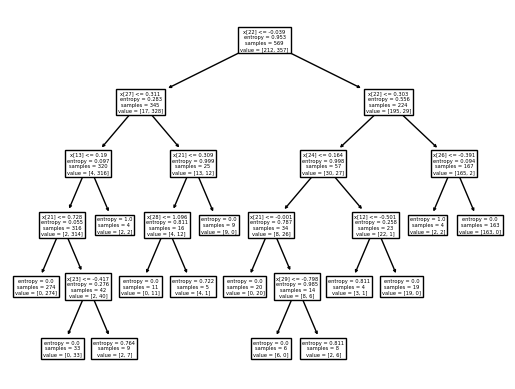

In [47]:
tree.plot_tree(gs.best_estimator_['model'])

##### graphviz를 사용한 시각화

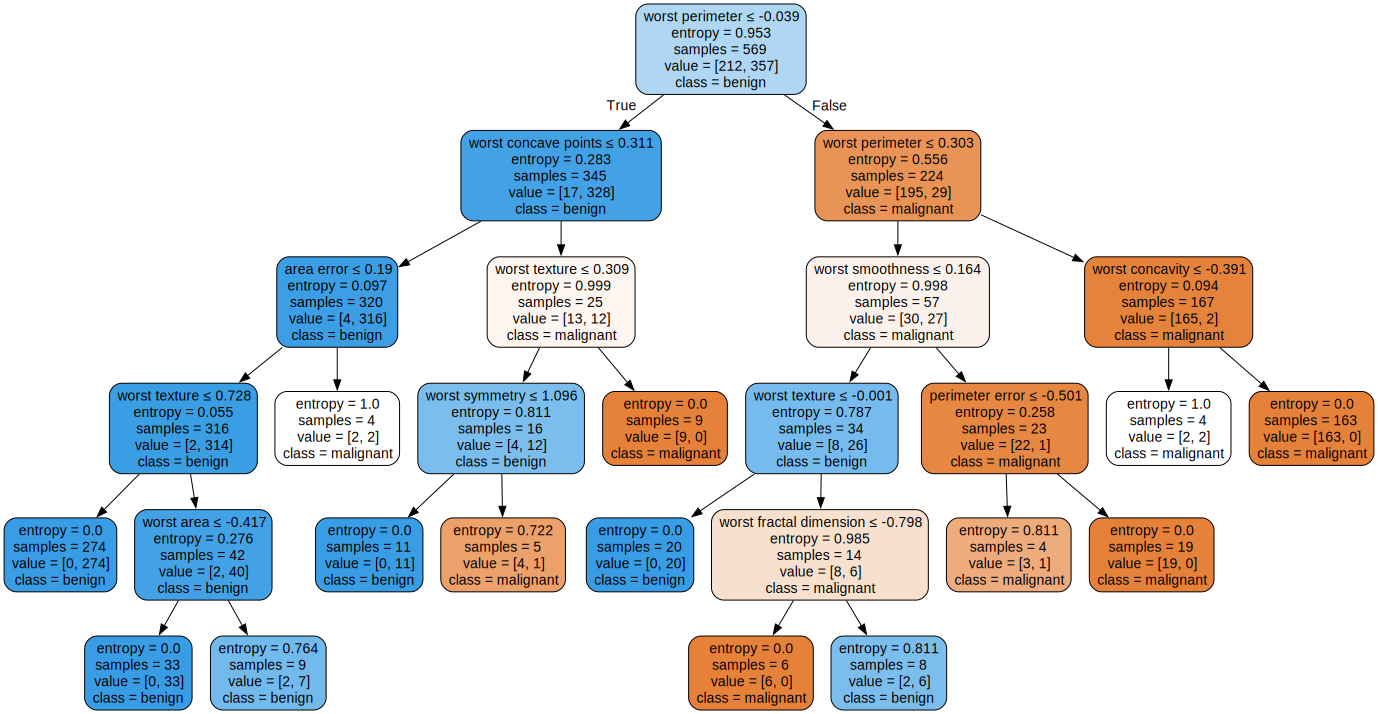

In [48]:

dot_data = tree.export_graphviz(decision_tree=gs.best_estimator_['model'],
                                feature_names = cancer.feature_names,
                                class_names = cancer.target_names,
                                filled = True, rounded = True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph


#### 시각화

In [49]:
n_classes = 3
plot_colors = 'ryb'
plot_step=0.02

##### 결정 경계 시각화

ValueError: X has 2 features, but StandardScaler is expecting 30 features as input.

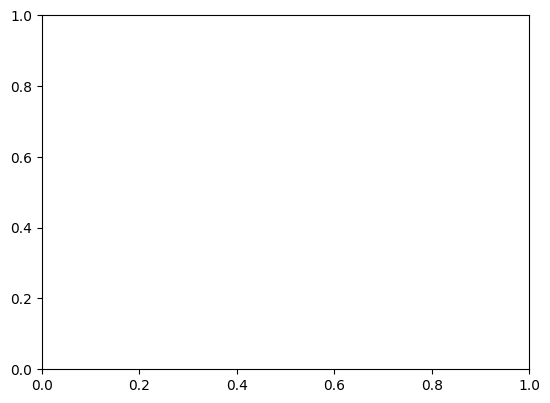

In [50]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3]]):
  x = cancer.data[:, pair]
  y = cancer.target

  model = gs.best_estimator_
#  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(cancer.feature_names[pair[0]])
  plt.ylabel(cancer.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

(5.981, 29.10099999999951, 142.5, 2501.980000001207)

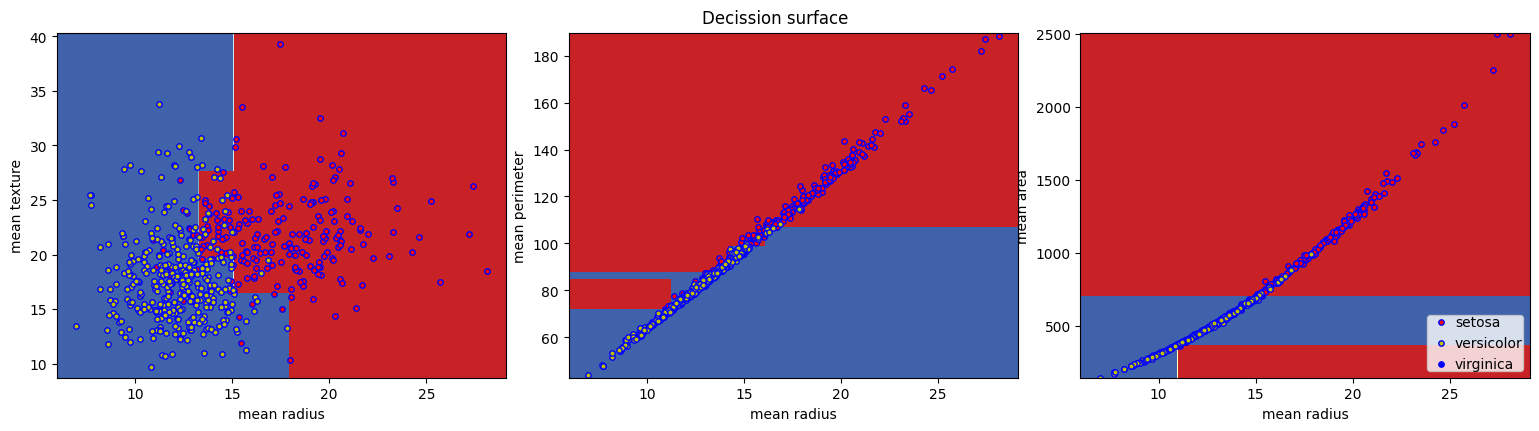

In [62]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3]]):
  x = cancer.data[:, pair]
  y = cancer.target

  model = gs.best_estimator_
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(cancer.feature_names[pair[0]])
  plt.ylabel(cancer.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

In [ ]:
#----------------------------------------------------

## 회귀 - `DecisionTreeRegressor()`

### 보스턴 주택 가격 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [ ]:
model = tree.DecisionTreeRegressor()

In [ ]:
cross_val_score(estimator=model,
                X=boston.data, y = boston.target,
                cv=5,
                n_jobs = multiprocessing.cpu_count()
                )

##### 전처리 후 학습

In [ ]:
model = make_pipeline(
    StandardScaler(),
    tree.DecisionTreeRegressor()
)

In [ ]:
cross_val_score(estimator=model,
                X=boston.data, y = boston.target,
                cv=5,
                n_jobs = multiprocessing.cpu_count()
                )

#### 학습된 결정 트리 시각화

In [ ]:
model = tree.DecisionTreeRegressor()
model.fit(boston.data, boston.target)

##### 텍스트를 통한 시각화

In [ ]:
print(tree.export_text(model))

##### plot_tree를 사용한 시각화

In [ ]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

In [ ]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names = boston.feature_names,
                                filled = True, rounded = True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

##### 회귀식 시각화

In [ ]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0, 1, 2]):
  x = boston.data[:, pair].reshape(-1, 1)
  y = boston.target

  model = tree.DecisionTreeRegressor()
  model = model.fit(x, y)

  x_test = np.arange(min(x), max(x), 0.1)[:, np.newaxis]
  predict = model.predict(x_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(x, y, s=20, edgecolors='k',
              c='darkorange', label='data')
  plt.plot(x_test, predict, color='royalblue', linewidth=2)
  plt.xlabel(boston.feature_names[pair])
  plt.ylabel('Target')

##### 하이퍼파리미터를 변경해 보면서 회귀식 시각화

In [ ]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0, 1, 2]):
  x = boston.data[:, pair].reshape(-1, 1)
  y = boston.target

  model = tree.DecisionTreeRegressor(max_depth=3)
  model = model.fit(x, y)

  x_test = np.arange(min(x), max(x), 0.1)[:, np.newaxis]
  predict = model.predict(x_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(x, y, s=20, edgecolors='k',
              c='darkorange', label='data')
  plt.plot(x_test, predict, color='royalblue', linewidth=2)
  plt.xlabel(boston.feature_names[pair])
  plt.ylabel('Target')

### 당뇨병 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [ ]:
# 당뇨병 데이터 전처리 없이 학습
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
# diabetes_df

model = tree.DecisionTreeRegressor()

cross_val_score(estimator=model,
                X=diabetes.data, y = diabetes.target,
                cv=5,
                n_jobs = multiprocessing.cpu_count()
                )

##### 전처리 후 학습

In [ ]:
model = make_pipeline(
    StandardScaler(),
    tree.DecisionTreeRegressor()
)

param_grid = [{"decisiontreeregressor__criterion":['mse', 'friedman_mse', 'mae'],
              "decisiontreeregressor__min_samples_leaf":[1, 2, 3, 4, 5, 6, 7, 8, 9],
              "decisiontreeregressor__max_depth":[2, 3, 4, 5, 6, None],
              "decisiontreeregressor__min_samples_split":[2, 3, 4, 5, 6, 7, 8, 9, 10],
}]

gs = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose = True 
)


In [ ]:
gs.fit(diabetes.data, diabetes.target)

In [ ]:
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)


#### 학습된 결정 트리 시각화

In [ ]:

r = tree.export_text(decision_tree=gs.best_estimator_['decisiontreeregressor'], # model_pipe['model']
                        feature_names = diabetes.feature_names)
print(r)

##### 텍스트를 통한 시각화

In [ ]:
tree.plot_tree(gs.best_estimator_['decisiontreeregressor'])

##### graphviz를 사용한 시각화

In [ ]:
dot_data = tree.export_graphviz(decision_tree=gs.best_estimator_['decisiontreeregressor'],
                                feature_names = diabetes.feature_names,
                                filled = True, rounded = True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

##### 회귀식 시각화

In [ ]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0, 1, 2]):
  x = diabetes.data[:, pair].reshape(-1, 1)
  y = diabetes.target


  model = tree.DecisionTreeRegressor()
  model = model.fit(x, y)

  x_test = np.arange(min(x), max(x), 0.1)[:, np.newaxis]
  predict = model.predict(x_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(x, y, s=20, edgecolors='k',
              c='darkorange', label='data')
  plt.plot(x_test, predict, color='royalblue', linewidth=2)
  plt.xlabel(diabetes.feature_names[pair])
  plt.ylabel('Target')